In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.shape

(545, 13)

In [8]:
df.index

RangeIndex(start=0, stop=545, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


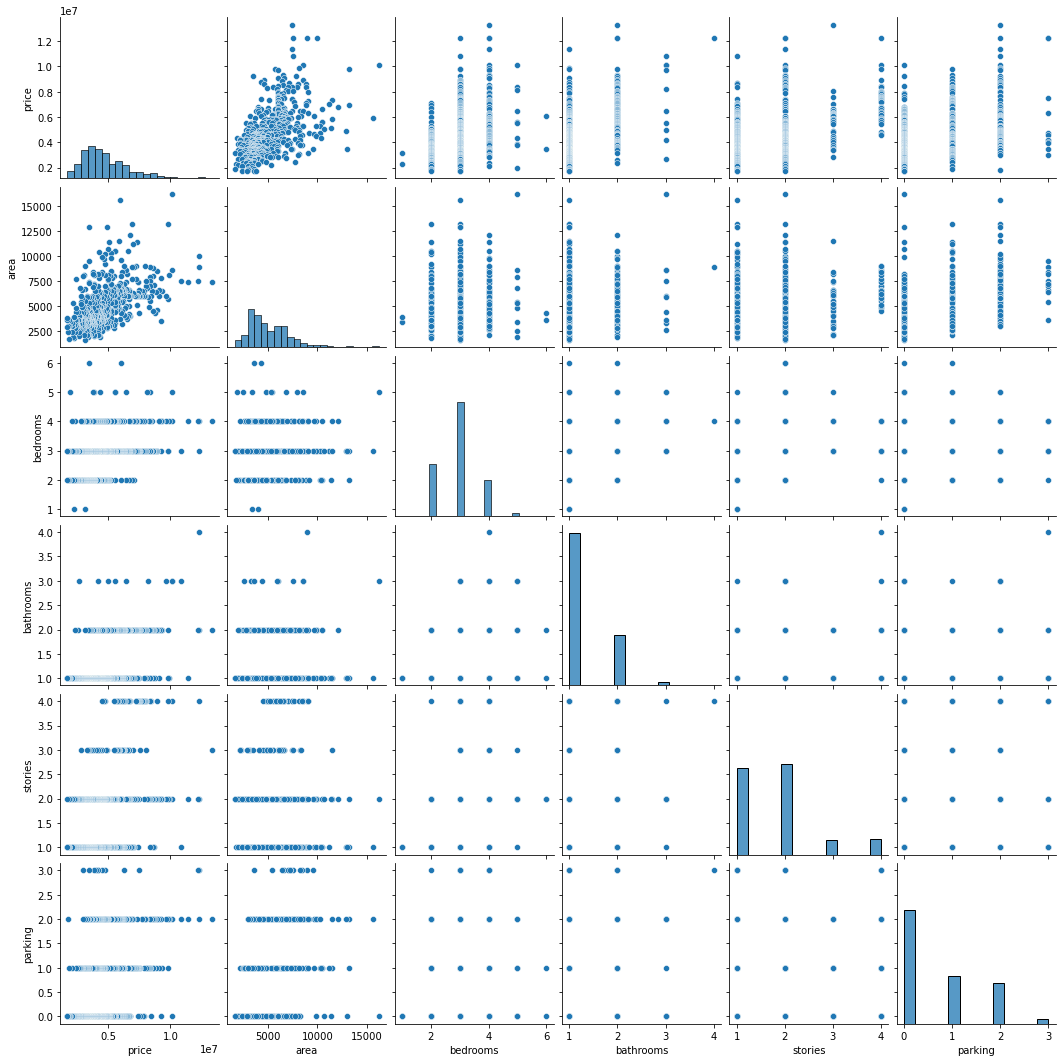

In [10]:
#Trying to plot numerical variables
sns.pairplot(df)
plt.show()

<AxesSubplot:>

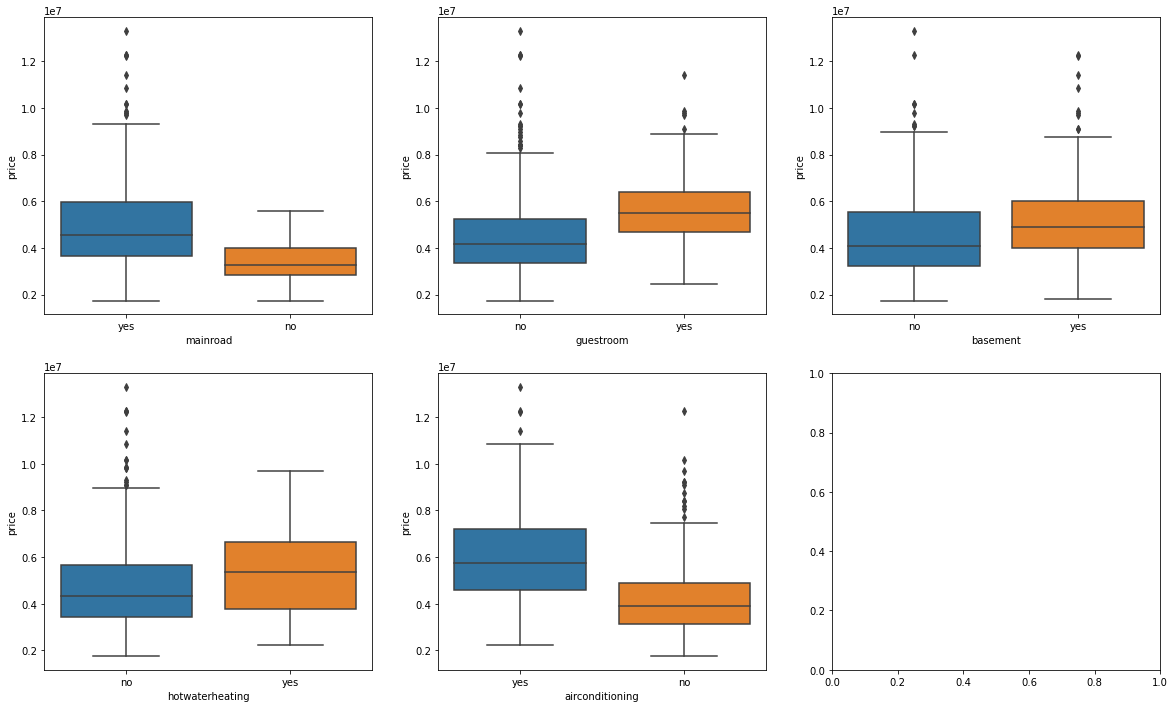

In [11]:
#categorical variable visualisation
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)

sns.boxplot(x = 'mainroad' , y = 'price' , data = df)
plt.subplot(2,3,2)


sns.boxplot(x = 'guestroom' , y = 'price' , data = df)
plt.subplot(2,3,3)


sns.boxplot(x = 'basement' , y = 'price' , data = df)
plt.subplot(2,3,4)


sns.boxplot(x = 'hotwaterheating' , y = 'price' , data = df)
plt.subplot(2,3,5)


sns.boxplot(x = 'airconditioning' , y = 'price' , data = df)
plt.subplot(2,3,6)



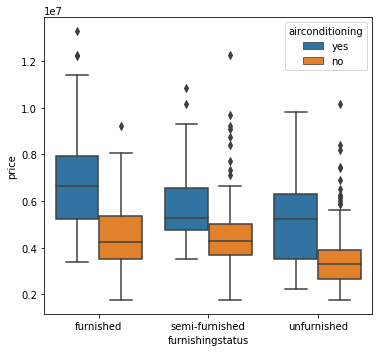

In [12]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'furnishingstatus', y = 'price' , data = df, hue = 'airconditioning')
plt.show()

In [13]:
#Data Preparation

#Convert yes to 1 and no to 0

varlist = ['mainroad', 'guestroom' , 'basement' ,'hotwaterheating', 'airconditioning' , 'prefarea']
len(varlist)

6

In [14]:
def binary_map(x):
    return x.map({'yes':1, 'no':0})


In [15]:
df[varlist] = df[varlist].apply(binary_map)

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [17]:
#Deal with variable with multiple levels
#Dummy variable

Status = pd.get_dummies(df['furnishingstatus'])

In [18]:
Status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [19]:
Status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
df = pd.concat([df, Status],axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [20]:
df.drop('furnishingstatus', axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [21]:
#Split the data into train and test Sets
#train is used to train or build our model = 70%
#Test is used to evaluate our model on unseen data

from sklearn.model_selection import train_test_split

In [22]:
np.random.seed(0)

df_train , df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [23]:
df_train.shape

(381, 14)

In [24]:
df_test.shape

(164, 14)

In [25]:
#Feature scaling 
#1 Min-Max scaling

#2 Standardization (mean 0, std = 1)

from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
df .columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [28]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'parking']

In [29]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
267,0.229697,0.271383,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,1,0
263,0.230303,0.187610,0.4,0.0,0.333333,0,0,0,0,0,0.000000,0,1,0
433,0.133333,0.144667,0.6,0.0,0.333333,0,0,0,0,0,0.333333,0,1,0
217,0.266667,0.442274,0.4,0.0,0.333333,1,0,0,0,1,0.666667,1,0,0
154,0.327273,0.159627,0.4,0.5,0.333333,1,0,0,0,0,0.666667,0,1,0


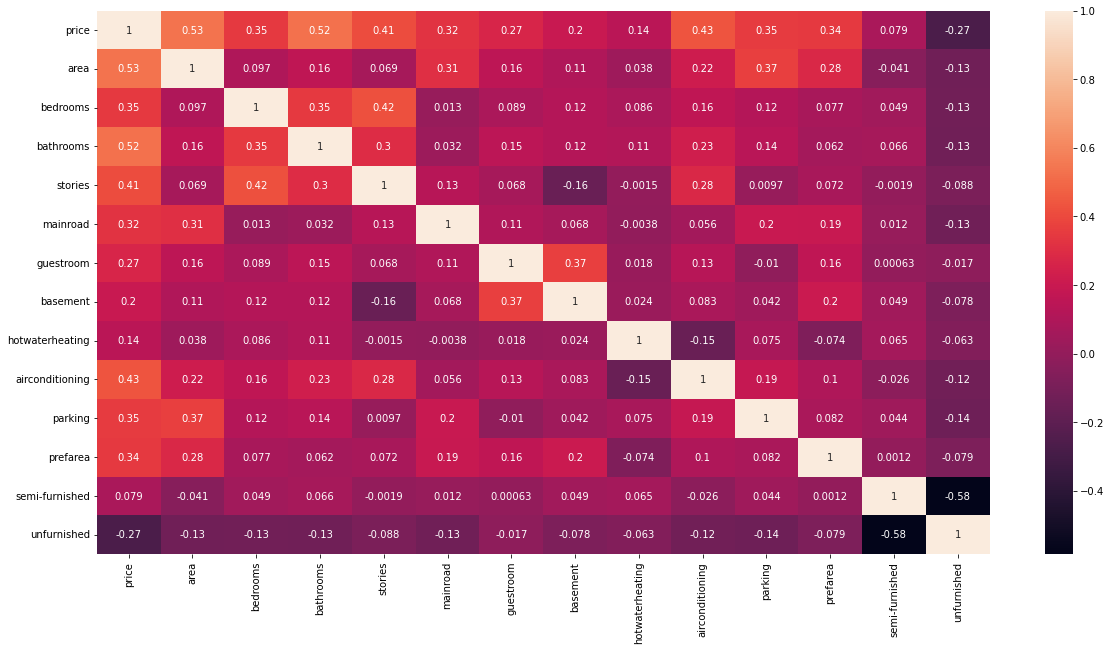

In [30]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [31]:
y_train = df_train.pop('price')
x_train = df_train

In [32]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [33]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [34]:
import statsmodels.api as sm

In [35]:
#add a constant for statsmodels

x_train_lm = sm.add_constant(x_train[['area']])
x_train_lm

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015
...,...,...
526,1.0,0.118268
53,1.0,0.291623
350,1.0,0.139388
79,1.0,0.366420


In [36]:
lr = sm.OLS(y_train, x_train_lm).fit()


In [37]:
lr.params

const    0.126894
area     0.462192
dtype: float64

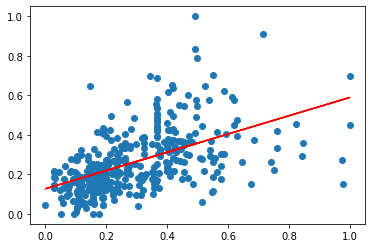

In [38]:
plt.scatter(x_train_lm.iloc[:,1], y_train)
plt.plot(x_train_lm.iloc[:,1] , 0.127 + 0.462 * x_train_lm.iloc[:,1], 'r')
plt.show()

In [39]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.15e-29
Time:                        16:34:19   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [40]:
x_train_lm = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train, x_train_lm).fit()
lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [41]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           8.83e-83
Time:                        16:34:19   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [42]:
# better metric to check multi coolinearity VIF = variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [43]:
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]


In [44]:
vif['VIF'] = round(vif['VIF'], 2)

In [45]:
vif = vif.sort_values(by = 'VIF', ascending = False)

In [46]:
print(vif)

           Features   VIF
1          bedrooms  7.33
4          mainroad  6.02
0              area  4.67
3           stories  2.70
11   semi-furnished  2.19
9           parking  2.12
6          basement  2.02
12      unfurnished  1.82
8   airconditioning  1.77
2         bathrooms  1.67
10         prefarea  1.51
5         guestroom  1.47
7   hotwaterheating  1.14


In [47]:
#want a vif that is less than 5
X = x_train.drop(['bedrooms','mainroad'], axis = 1)

In [55]:
X = sm.add_constant(x_train)
print(x_train.head())
print(X.head())
lr_2 = sm.OLS(y_train, X).fit()
lr_2.params
lr_2.summary()

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
359  0.155227       0.4        0.0  0.000000         1          0         0   
19   0.403379       0.4        0.5  0.333333         1          0         0   
159  0.115628       0.4        0.5  0.000000         1          1         1   
35   0.454417       0.4        0.5  1.000000         1          0         0   
28   0.538015       0.8        0.5  0.333333         1          0         1   

     hotwaterheating  airconditioning   parking  prefarea  semi-furnished  \
359                0                0  0.333333         0               0   
19                 0                1  0.333333         1               1   
159                0                1  0.000000         0               0   
35                 0                1  0.666667         0               0   
28                 1                0  0.666667         0               0   

     unfurnished  
359            1  
19             0  
159  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           8.83e-83
Time:                        16:58:20   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif2 = pd.DataFrame()
vif2['Features'] = X.columns
vif2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif2['VIF'] = round(vif['VIF'], 2)
vif2 = vif2.sort_values(by = 'VIF', ascending = False)
print(vif2)

           Features   VIF
1              area  7.33
4           stories  6.02
0             const  4.67
3         bathrooms  2.70
11         prefarea  2.19
9   airconditioning  2.12
6         guestroom  2.02
12   semi-furnished  1.82
8   hotwaterheating  1.77
2          bedrooms  1.67
10          parking  1.51
5          mainroad  1.47
7          basement  1.14
13      unfurnished   NaN


In [1]:
#Assumptions in -> OLS
# 1.Linearity
# 2.The independent variable should not be correlated with error term
# 3.No predictor variables should be perfectly explained by other predictor variables
